In [192]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [193]:
#load Data
gdp_per_capita = pd.read_csv("Python_Test/GDP_to_LIFE/gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")
oecd_bli = pd.read_csv("Python_Test/GDP_to_LIFE/oecd_bli_2015.csv", thousands=',')

In [194]:
#print (gdp_per_capita.head(10)) # you can remove the comment to look at the data 

In [195]:
#print (oecd_bli.head(10)) # you can remove the comment to look at the data 

In [196]:
#list(oecd_bli.columns) #show all the columns in a List format.

In [197]:
# Prepare the data
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] #compare all the values in the column INEQUALITY with a value  
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") # Create a pivot data with rows as Country and coulmns as Indicator 
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) #replace the name of the columns with anothe name
gdp_per_capita.set_index("Country", inplace=True) #change the index of the dataframe and the data is renamed in place. 
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
#regularization remove_indices = [0, 1, 6, 8, 33, 34, 35]
country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']]
country_stats.to_csv('country_stats.csv',encoding='utf-8')
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

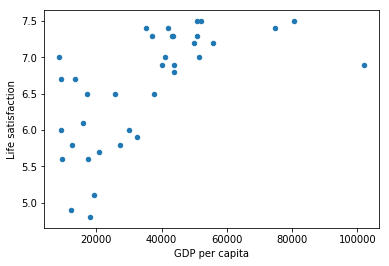

In [198]:
#Visualize the data
country_stats.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')
plt.show()

In [199]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [200]:
# Train the model
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [201]:
#plot Regression model
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.28653637]]


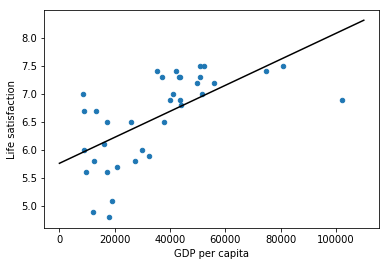

In [202]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
X_1 = np.linspace(0, 110000, 1000)
country_stats.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')
plt.plot(X_1, t0 + t1 * X_1, "k")
plt.show()

In [203]:
import sklearn.neighbors
model_1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [190]:
# Train the model
model_1.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [191]:
#plot K Regression model
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model_1.predict(X_new))

[[5.76666667]]
